In [1]:
cd /mnt/scratch/metric-synth-runs/

/mnt/scratch/metric-synth-runs


In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
from shared import load, plot_ablations, method_table, construct_table

plt.rcParams.update(
    {
        "font.family": "serif",
        "text.usetex": True,
        "pgf.rcfonts": False,
        "pgf.preamble": "\n".join(
            [r"\documentclass[acmsmall,review,timestamp]{acmart}"]
        ),
    }
)

In [48]:
df = pd.concat([load('towers'), load('towers-enum')])

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:00<00:00, 55342.05it/s]


In [49]:
df

,method,bench,max_cost,n_groups,threshold,success,runtime,program_size,timeout,local_search_steps,...,extract,repair,rank,repair_time,xfta_time,cluster_time,extract_time,rank_time,expansion_time,exhaustive_width
12,metric-tower-standard,test0.sexp,40,100,0.4,True,1.851245,13.0,0.0,100,...,Exhaustive,Guided,True,0.0,1.849726,0.171918,0.0,0.004887,0.796859,16
1,metric-tower-standard,test1.sexp,40,100,0.4,True,1.835881,13.0,0.0,100,...,Exhaustive,Guided,True,0.0,1.834399,0.168037,0.0,0.004836,0.770337,16
26,metric-tower-standard,test10.sexp,40,100,0.4,True,8.703764,20.0,0.0,100,...,Exhaustive,Guided,True,0.0,8.70219,0.715516,0.0,0.004172,4.57425,16
2,metric-tower-standard,test11.sexp,40,100,0.4,True,8.83117,20.0,0.0,100,...,Exhaustive,Guided,True,0.0,8.829574,0.745253,0.0,0.004044,4.608744,16
10,metric-tower-standard,test12.sexp,40,100,0.4,False,NaN,NaN,1.0,100,...,Exhaustive,Guided,True,0.0,0.0,17.538958,0.0,0.005146,236.34942,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,enum-tower,test5.sexp,None,None,None,False,None,NaN,0.0,None,...,None,None,None,None,None,None,None,None,None,None
29,enum-tower,test6.sexp,None,None,None,False,None,NaN,0.0,None,...,None,None,None,None,None,None,None,None,None,None
23,enum-tower,test7.sexp,None,None,None,False,None,NaN,0.0,None,...,None,None,None,None,None,None,None,None,None,None
5,enum-tower,test8.sexp,None,None,None,False,None,NaN,0.0,None,...,None,None,None,None,None,None,None,None,None,None


In [33]:
n_bench = 34
baseline_perc = 0.575
baseline_solved = (40 * baseline_perc)
baseline_solved

23.0

<Figure size 432x288 with 0 Axes>

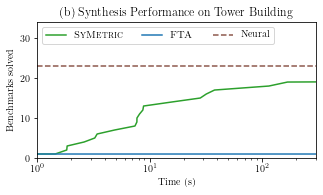

In [51]:
def plot():
    plt.tight_layout()
    fig = plt.figure(figsize=(5, 2.5))
    ax = fig.add_subplot(1, 1, 1)

    std = df[(df["method"] == "metric-tower-standard")]["runtime"]
    std = std.sort_values().fillna(1e10)
    ax.plot(
        [0] + list(std), range(0, len(std) + 1), label=r"\textsc{SyMetric}", color="C2"
    )
    
    enum = df[(df["method"] == "enum-tower")]["runtime"]
    enum = enum.sort_values().fillna(1e10)
    ax.plot(
        [0] + list(enum), range(0, len(enum) + 1), label=r"\textsc{FTA}", color="C0"
    )
    
    ax.axhline(y=baseline_solved, linestyle='--', label='Neural', color='C5') # horizontal

    ax.set_ylim([0, n_bench])
    ax.set_xlim([1, 300])
    ax.set_xscale('log')
    ax.set_ylabel("Benchmarks solved")
    ax.set_xlabel("Time (s)")
    ax.legend(loc="upper left", ncol=3)
    ax.set_title(r"(b) Synthesis Performance on Tower Building")
    plt.savefig('/home/feser/634da4c60a6e2fe917f357dc/metric_synth/towers_comparison.pdf', bbox_inches='tight')
plot()

In [55]:
text = """
   0   24   75 bench/tower/test0.sexp
   0   24   75 bench/tower/test1.sexp
   0   24   75 bench/tower/test2.sexp
   0   24   75 bench/tower/test3.sexp
   0   24   75 bench/tower/test4.sexp
   0   24   75 bench/tower/test5.sexp
   0   24   75 bench/tower/test6.sexp
   0   24   75 bench/tower/test7.sexp
   0   24   75 bench/tower/test8.sexp
   0   24   75 bench/tower/test9.sexp
   0   24   75 bench/tower/test10.sexp
   0   24   75 bench/tower/test11.sexp
   0   31  110 bench/tower/test12.sexp
   0   31  110 bench/tower/test13.sexp
   0   31  110 bench/tower/test14.sexp
   0   31  110 bench/tower/test15.sexp
   0   28   87 bench/tower/test16.sexp
   0   28   87 bench/tower/test17.sexp
   0   28   87 bench/tower/test18.sexp
   0   28   87 bench/tower/test19.sexp
   0   28   87 bench/tower/test20.sexp
   0   28   87 bench/tower/test21.sexp
   0   27   89 bench/tower/test22.sexp
   0   27   89 bench/tower/test23.sexp
   0   27   89 bench/tower/test24.sexp
   0   27   89 bench/tower/test25.sexp
   0   27   89 bench/tower/test26.sexp
   0   27   89 bench/tower/test27.sexp
   0   27   89 bench/tower/test28.sexp
   0   31  109 bench/tower/test29.sexp
   0   29   97 bench/tower/test30.sexp
   0   33  105 bench/tower/test31.sexp
   0   31  101 bench/tower/test32.sexp
   0   31  101 bench/tower/test33.sexp
"""
np.mean([float(l.split()[1]) for l in text.strip().split('\n')])

27.176470588235293